In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_data= pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()
print(test_data.shape)

(418, 11)


In [4]:

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data=train_data[['Survived','Pclass','Sex','Age','Fare','SibSp','Parch']] #4 colonnes nous interessent
train_data.dropna(axis=0,inplace=True)#permet de supprimer les lignes qui ont des cases vident
train_data.describe()


,Survived,Pclass,Age,Fare,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514,0.512605,0.431373
std,0.491460,0.838250,14.526497,52.918930,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,15.741700,0.000000,0.000000
75%,1.000000,3.000000,38.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,5.000000,6.000000


In [6]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,0
4,0,3,0,35.0,8.0500,0,0


In [7]:


from sklearn.model_selection import train_test_split
y=train_data['Survived']
X=train_data.drop(['Survived'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=5)

In [8]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
print('Train set:', model.score(X_train,y_train))

Train set: 0.8619246861924686


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,scoring='accuracy')

array([0.82291667, 0.79166667, 0.82291667, 0.78947368, 0.75789474])

In [12]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


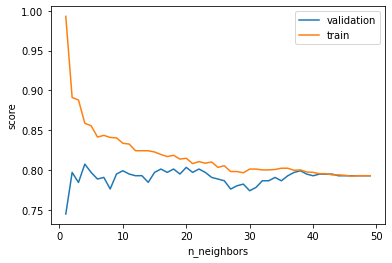

In [13]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score=validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5) 
#cv = nombre de decoupe qu'on veut avoir dans cross validation
#n_neighbors=nom de l'hyper parametre qu'on desire reglé
#val_score
#val_score.mean(axis=1)
plt.plot(k,val_score.mean(axis=1), label='validation')
plt.plot(k,train_score.mean(axis=1), label='train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
#on cree un dictionnaire avec les hyperparametres qu'on desire utilisé
param_grid={'n_neighbors':np.arange(1,20),
            'metric':['euclidean','manhathan','minkowski','canberra'],'weights':['uniform','distance']}
#on crée une grille avec un avec notre model, dictionnaire et cv qu'on veut
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
#on entraine notre model avec les données d'entrainnements
grid.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 336, in _check_algorithm_metric
    % (self.metric, alg_check))
ValueError: Metric 'manhathan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/opt/conda/lib/p

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhathan', 'minkowski',
                                    'canberra'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [16]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}

In [17]:
grid.best_score_

0.8074780701754387

In [18]:
model=grid.best_estimator_

In [19]:
model.score(X_test,y_test)

0.8135593220338984

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[127,  15],
       [ 29,  65]])

In [21]:
from sklearn.model_selection import learning_curve
learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)

(array([ 38,  76, 114, 152, 191, 229, 267, 305, 343, 382]),
 array([[0.86842105, 0.84210526, 0.84210526, 0.84210526, 0.84210526],
        [0.86842105, 0.88157895, 0.88157895, 0.88157895, 0.88157895],
        [0.84210526, 0.85087719, 0.85964912, 0.85964912, 0.85964912],
        [0.86842105, 0.875     , 0.86184211, 0.86184211, 0.86184211],
        [0.86387435, 0.86910995, 0.85340314, 0.84816754, 0.84816754],
        [0.86899563, 0.88209607, 0.86462882, 0.85152838, 0.85152838],
        [0.86891386, 0.86891386, 0.87640449, 0.87265918, 0.87265918],
        [0.8557377 , 0.8557377 , 0.86557377, 0.84918033, 0.86885246],
        [0.86297376, 0.85714286, 0.85131195, 0.8483965 , 0.87463557],
        [0.86125654, 0.85602094, 0.85602094, 0.84554974, 0.87172775]]),
 array([[0.76041667, 0.75      , 0.85416667, 0.82105263, 0.72631579],
        [0.71875   , 0.79166667, 0.83333333, 0.83157895, 0.72631579],
        [0.71875   , 0.78125   , 0.82291667, 0.86315789, 0.76842105],
        [0.76041667, 0.77083

[ 38  76 114 152 191 229 267 305 343 382]


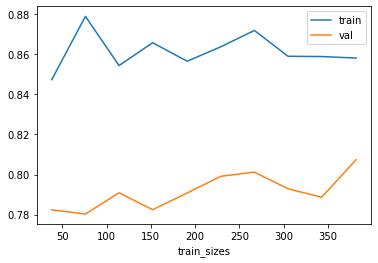

In [22]:
N,train_score,val_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='val')
plt.xlabel('train_sizes')
plt.legend()

In [23]:
test_data.head()
test_data.dropna(axis=0,inplace=True)

In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [25]:
X_submission = test_data
X_submission.replace(['male','female'],[0,1],inplace=True)
print(X_submission)

     PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
28           920       1                            Brady, Mr. John Bertram   
..           ...     ...                                                ...   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
407         1299       1                         Widener, Mr. George Dunton   
411         1303       1    Minahan, Mrs. William Edward (Lillian E Thorpe)   
414         1306       1                       Oliva y Ocana, Dona. Fermina   

     Sex   Age  SibSp  Parch         Ticket      Fa

In [26]:
test_predictions = model.predict(X_test)

print(confusion_matrix(y_test, test_predictions))


[[127  15]
 [ 29  65]]


In [27]:
X_submission.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
y_submission = model.predict(X_submission[['Age', 'Sex', 'Age','Fare','SibSp','Parch']])


In [29]:
output = pd.DataFrame({'PassengerId': X_submission.PassengerId, 'Survived': y_submission})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [30]:
y_submission

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])